# Learning Influence Relationship from Data: Finance Use case 


Source: https://x-datainitiative.github.io/tick/auto_examples/plot_hawkes_finance_data.html

In [49]:
import numpy as np

from tick.dataset import fetch_hawkes_bund_data
from tick.hawkes import HawkesConditionalLaw
from tick.plot import plot_hawkes_kernel_norms


## Fetch time stamp data 
timestamps_list = fetch_hawkes_bund_data()

## Initialize model 
hawkes_learner = HawkesConditionalLaw(
    claw_method="log", delta_lag=0.1, min_lag=5e-4, max_lag=500,
    quad_method="log", n_quad=10, min_support=1e-4, max_support=1, n_threads=4)


/home/yido/Downloads/y/lib/python3.8/site-packages/tick/dataset/download_helper.py:214: UserWarning: TICK_DATASETS environment variable was not set. Saving dataset to the default location ~/tick_datasets
  warnings.warn('{} environment variable was not set. Saving dataset'


## Learning

**Interpretation**

* Tb and Ta have self-exciting influences 
* Pd excites Ta
* Pu excites Pd
* Pd excites Pu

etc 

## Learning: Different data sizes

### Just the 1st day

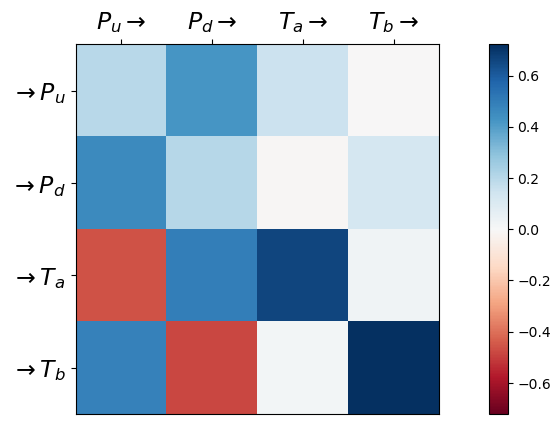

In [55]:
hawkes_learner.fit(timestamps_list[0])
adjacency_plot = plot_hawkes_kernel_norms(hawkes_learner,
                         node_names=["P_u", "P_d", "T_a", "T_b"])

### All of Dataset

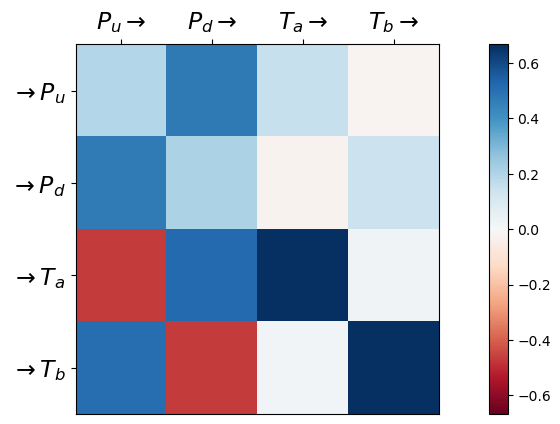

In [29]:
hawkes_learner.fit(timestamps_list)
adjacency_plot = plot_hawkes_kernel_norms(hawkes_learner,
                         node_names=["P_u", "P_d", "T_a", "T_b"])